In [1]:
import numpy as np
import utils
import linear
import pandas as pd
import scipy
import math
import scipy
import matplotlib.pyplot as plt
from itertools import permutations
import random

In [2]:
utils.set_random_seed(1)
B_true = utils.simulate_dag(30, 30, "ER")
W_true = utils.simulate_parameter(B_true)
X = utils.simulate_linear_sem(W_true, 29, "gauss", noise_scale=np.random.uniform(0.5, 5, 30))
#linear.notears_linear(X, lambda1=0, loss_type="l2", W_true=W_true)

In [6]:
B_true = np.zeros([12, 12])
for i in range(12):
    if (i+1) % 3 == 0:
        B_true[i-1, i] = 1
        B_true[i-2, i] = 1
W_true = utils.simulate_parameter(B_true)

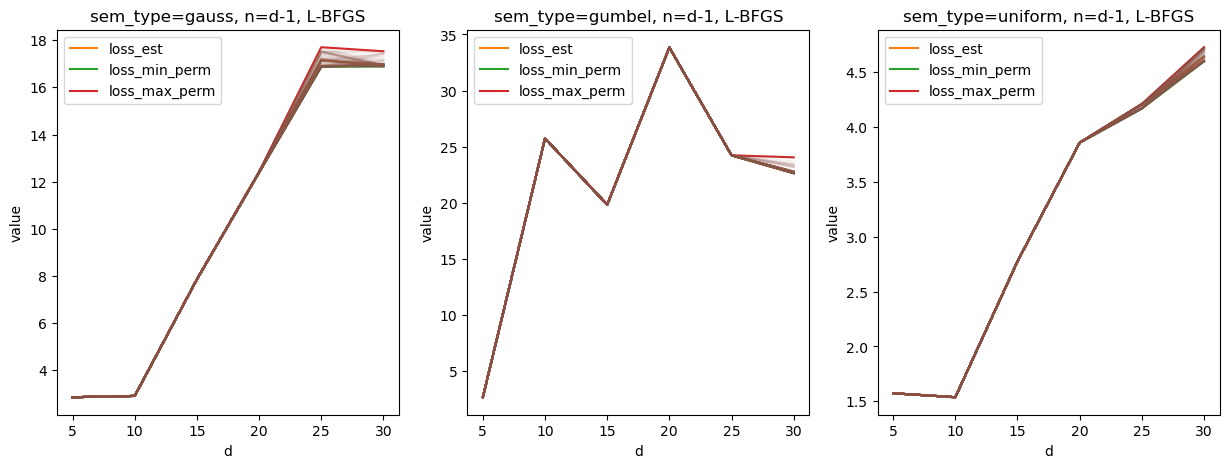

In [20]:
semtypes = ["gauss", "gumbel", "uniform"]
ds = [5, 10, 15, 20, 25, 30]
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
colormap = plt.cm.tab10
loss_f = ["loss_true", "loss_est", "loss_min_perm", "loss_max_perm"]
#losses = ["loss_est_2", "loss_l1_2", "obj_aug_", "obj_dual_2"]
#losses = ["loss_est_t", "loss_l1_t", "obj_aug_t", "obj_dual_t"]
#losses = ["h", "h_2", "h_t"]
for i, sem_type in enumerate(semtypes):
    result_d = np.zeros([len(ds), len(loss_f)+100])
    for j, d in enumerate(ds):
        result = pd.read_csv("./results_loss2/result_"+str(5023)+"_"+sem_type+"_"+str(d)+".csv")
        result_d[j, :2] = result.iloc[:2, 0]
        min_ind = np.argmin(result.iloc[2:, 0]) + 2
        result_d[j, 2] = result.iloc[min_ind, 0]
        max_ind = np.argmax(result.iloc[2:, 0]) + 2
        result_d[j, 3] = result.iloc[max_ind, 0]
        for k in range(100):
            result_d[j, k+4] = result.iloc[k+2, 0]

    ax = axs[i]
    for p in range(4):
        if p >0:
            ax.plot(ds, result_d[:,p], marker='', label=loss_f[p], color=colormap(p))
    for p in range(100):
        ax.plot(ds, result_d[:,p+4], marker='', alpha=0.1, color=colormap(5))
    ax.set_xlabel('d')
    ax.set_ylabel("value")
    ax.set_title(f'sem_type={sem_type}, n=d-1, L-BFGS')
    ax.legend()
plt.subplots_adjust(wspace=.2, hspace=.4)
plt.savefig("./results_loss2/loss_perm_1.png")
plt.suptitle
plt.show()

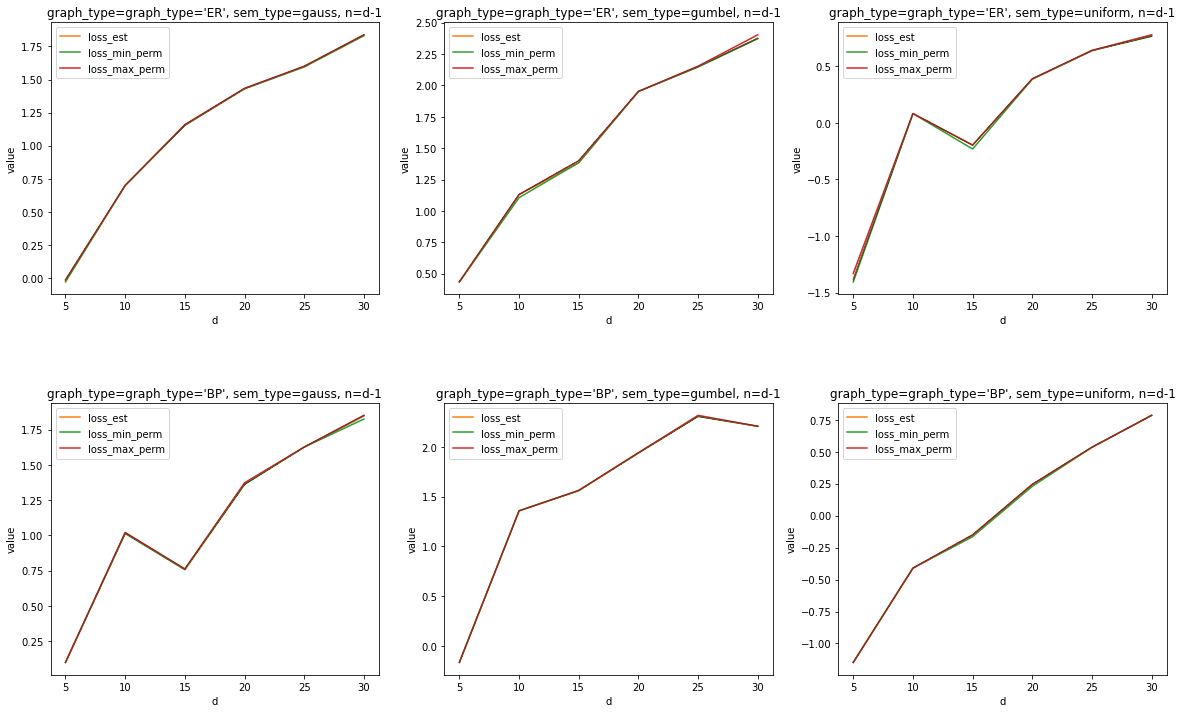

In [3]:
semtypes = ["gauss", "gumbel", "uniform"]
ds = [5, 10, 15, 20, 25, 30]
graphtypes = ["ER", "BP"]
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))
colormap = plt.cm.tab10
loss_f = ["loss_true", "loss_est", "loss_min_perm", "loss_max_perm"]
#losses = ["loss_est_2", "loss_l1_2", "obj_aug_", "obj_dual_2"]
#losses = ["loss_est_t", "loss_l1_t", "obj_aug_t", "obj_dual_t"]
#losses = ["h", "h_2", "h_t"]
for g, graph_type in enumerate(graphtypes):
    for i, sem_type in enumerate(semtypes):
        result_d = np.zeros([len(ds), len(loss_f)+100])
        for j, d in enumerate(ds):
            result = pd.read_csv("./results_loss2/result_"+str(int(5000+3*g))+"_"+sem_type+"_"+str(d)+".csv")
            result_d[j, :2] = result.iloc[:2, 0]
            min_ind = np.argmin(result.iloc[2:, 0]) + 2
            result_d[j, 2] = result.iloc[min_ind, 0]
            max_ind = np.argmax(result.iloc[2:, 0]) + 2
            result_d[j, 3] = result.iloc[max_ind, 0]
            for k in range(100):
                result_d[j, k+4] = result.iloc[k+2, 0]

        ax = axs[g, i]
        for p in range(4):
            if p >0:
                ax.plot(ds,np.log(result_d[:,p]), marker='', label=loss_f[p], color=colormap(p))
        for p in range(100):
            ax.plot(ds, np.log(result_d[:,p+4]), marker='', alpha=0.005, color=colormap(5))
        ax.set_xlabel('d')
        ax.set_ylabel("value")
        ax.set_title(f'graph_type={graph_type=}, sem_type={sem_type}, n=d-1')
        ax.legend()
plt.subplots_adjust(wspace=.2, hspace=.4)
plt.savefig("./results_loss2/loss_perm_3.png")
plt.show()

In [25]:
for i in permutations([3,4,5]):
    for j in permutations([0,1,2]):
        print(list(i)+list(j))

[3, 4, 5, 0, 1, 2]
[3, 4, 5, 0, 2, 1]
[3, 4, 5, 1, 0, 2]
[3, 4, 5, 1, 2, 0]
[3, 4, 5, 2, 0, 1]
[3, 4, 5, 2, 1, 0]
[3, 5, 4, 0, 1, 2]
[3, 5, 4, 0, 2, 1]
[3, 5, 4, 1, 0, 2]
[3, 5, 4, 1, 2, 0]
[3, 5, 4, 2, 0, 1]
[3, 5, 4, 2, 1, 0]
[4, 3, 5, 0, 1, 2]
[4, 3, 5, 0, 2, 1]
[4, 3, 5, 1, 0, 2]
[4, 3, 5, 1, 2, 0]
[4, 3, 5, 2, 0, 1]
[4, 3, 5, 2, 1, 0]
[4, 5, 3, 0, 1, 2]
[4, 5, 3, 0, 2, 1]
[4, 5, 3, 1, 0, 2]
[4, 5, 3, 1, 2, 0]
[4, 5, 3, 2, 0, 1]
[4, 5, 3, 2, 1, 0]
[5, 3, 4, 0, 1, 2]
[5, 3, 4, 0, 2, 1]
[5, 3, 4, 1, 0, 2]
[5, 3, 4, 1, 2, 0]
[5, 3, 4, 2, 0, 1]
[5, 3, 4, 2, 1, 0]
[5, 4, 3, 0, 1, 2]
[5, 4, 3, 0, 2, 1]
[5, 4, 3, 1, 0, 2]
[5, 4, 3, 1, 2, 0]
[5, 4, 3, 2, 0, 1]
[5, 4, 3, 2, 1, 0]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


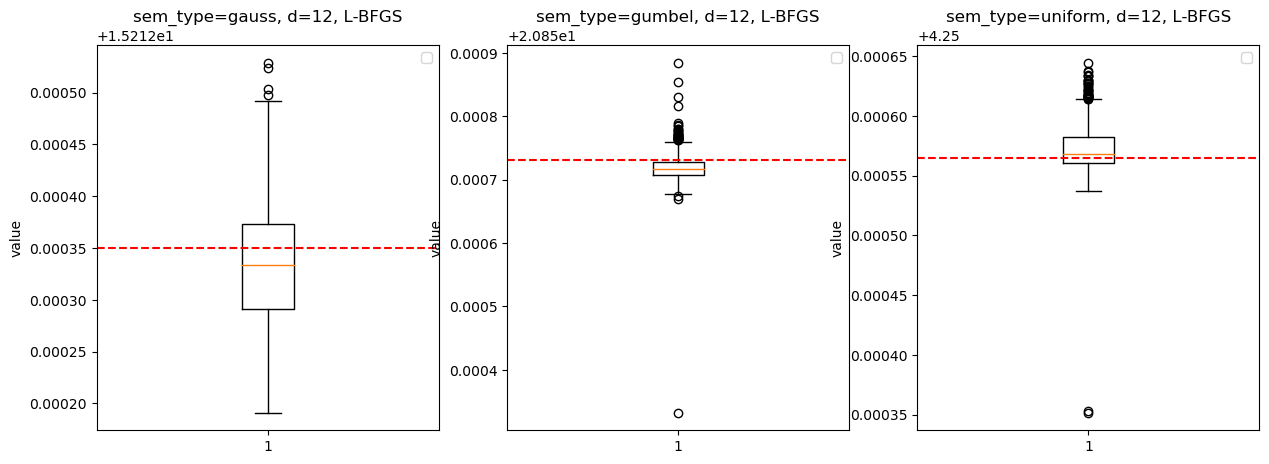

In [26]:
semtypes = ["gauss", "gumbel", "uniform"]
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
colormap = plt.cm.tab10
loss_f = ["loss_true", "loss_est", "loss_min_perm", "loss_max_perm"]
#losses = ["loss_est_2", "loss_l1_2", "obj_aug_", "obj_dual_2"]
#losses = ["loss_est_t", "loss_l1_t", "obj_aug_t", "obj_dual_t"]
#losses = ["h", "h_2", "h_t"]
for i, sem_type in enumerate(semtypes):
    result = pd.read_csv("./results_loss2/result_"+str(5025)+"_"+sem_type+"_"+str(12)+".csv")

    ax = axs[i]
    ax.boxplot(result.iloc[2:, 0])
    #ax.axhline(result.iloc[0, 0], color="grey", linestyle="--")
    ax.axhline(result.iloc[1, 0], color="red", linestyle="--")
    #ax.set_xlabel('d')
    ax.set_ylabel("value")
    ax.set_title(f'sem_type={sem_type}, d=12, L-BFGS')
    ax.legend()
plt.subplots_adjust(wspace=.2, hspace=.4)
plt.savefig("./results_loss2/loss_perm_1.png")
plt.suptitle
plt.show()